In [1]:
import csv

In [2]:
def read_result_random_search(file_path):
    valid_count = 0
    compiled_count = 0
    passed_count = 0
    set = {'0'}

    try:
        with open(file_path, mode='r') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                if row['PatchIndex'] not in set:
                    if row['PatchValid'] == 'true':
                        valid_count += 1
                    if row['PatchCompiled'] == 'true':
                        compiled_count += 1
                    if row['TestPassed'] == 'true':
                        passed_count += 1
                    set.add(row['PatchIndex'])
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return
    except KeyError:
        print(f"'isValid' column not found in the file: {file_path}")
        return
    except Exception as e:
        print(f"An error occurred: {e}")
        return
    return valid_count, compiled_count, passed_count

In [4]:
read_result_random_search('jcodec.RandomSampler_COMBINED_1000_output.gemma.csv')

File not found: jcodec.RandomSampler_COMBINED_1000_output.gemma.csv


In [5]:
import os
import re


valid_counts = []
compiled_counts = [] 
passed_counts = [] 

index = []

# The pattern to match both types of filenames and capture the changing parts
pattern = r"jcodec\.RandomSampler_([A-Z]+)(_([A-Z]+))?_1000_output(\.gemma)?\.csv"

# Get the current directory
current_directory = os.getcwd()

# Iterate over all files in the current directory
for filename in os.listdir(current_directory):
    if os.path.isfile(filename):
        match = re.match(pattern, filename)
        if match:
            main_part = match.group(1)
            optional_part = match.group(3)

            valid_count, compiled_count, passed_count = read_result_random_search(filename)
            valid_counts.append(valid_count)
            compiled_counts.append(compiled_count)
            passed_counts.append(passed_count)
            index.append(main_part + (f"_{optional_part}" if optional_part else ""))
            # print(f"{filename} matches the pattern.")
            print(f"Main part: {main_part}")
            if optional_part:
                print(f"Optional part: {optional_part}")

Main part: STATEMENT


In [6]:
valid_count, compiled_count, passed_count = read_result_random_search("jcodec.RandomSampler_LLM_SIMPLE_MASKED._1000_output.gemma.csv")

File not found: jcodec.RandomSampler_LLM_SIMPLE_MASKED._1000_output.gemma.csv


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
valid_counts.append(valid_count)
compiled_counts.append(compiled_count)
passed_counts.append(passed_count)
index.append("LLM_SIMPLE_MASKED")

In [4]:
import matplotlib.pyplot as plot
import pandas as pd

In [8]:
# Library Import(numpy and matplotlib)

# Make a data definition
_data = {"valid": valid_counts, "compiled": compiled_counts, "passed": passed_counts}
_df = pd.DataFrame(_data,columns=["valid", "compiled", "passed"], index = index)
 
# Multiple horizontal bar chart
_df.plot.barh()
plot.title('Random Search of JCodec project using Gemma and produce 500 patches')
plot.xlim(0, 500)
plot.savefig('random_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plot.show()


NameError: name 'valid_counts' is not defined

In [ ]:
import re

# The pattern to match both types of filenames and capture the changing parts
pattern = r"jcodec\.RandomSampler_([A-Z]+)(_([A-Z]+))?_1000_output(\.gemma)?\.csv"

# Example filenames
filenames = [
    "jcodec.RandomSampler_STATEMENT_1000_output.csv",
    "jcodec.RandomSampler_LLM_MEDIUM_1000_output.gemma.csv"
]

# Check if the filenames match the pattern and extract the STATEMENT parts
for filename in filenames:
    match = re.match(pattern, filename)
    if match:
        main_part = match.group(1)
        optional_part = match.group(3)
        print(f"{filename} matches the pattern.")
        print(f"Main part: {main_part}")
        if optional_part:
            print(f"Optional part: {optional_part}")
    else:
        print(f"{filename} does not match the pattern.")


jcodec.RandomSampler_STATEMENT_1000_output.csv matches the pattern.
Main part: STATEMENT
jcodec.RandomSampler_LLM_MEDIUM_1000_output.gemma.csv matches the pattern.
Main part: LLM
Optional part: MEDIUM


In [3]:
import statistics
def read_result_local_search(file_path):
    fitness_improvement = []
    try:
        with open(file_path, mode='r') as file:
            csv_reader = csv.DictReader(file)
            for row in csv_reader:
                if row['FitnessImprovement'] is not None and float(row['FitnessImprovement']) > 0:
                    fitness_improvement.append(float(row['FitnessImprovement']))
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return
    except KeyError:
        print(f"'isValid' column not found in the file: {file_path}")
        return
    except Exception as e:
        print(f"An error occurred: {e}")
        return
    
    max_improvement = max(fitness_improvement) if fitness_improvement else 0
    median_improvement = statistics.median(fitness_improvement) if fitness_improvement else 0
    imporvement_patch_count = len(fitness_improvement)

    return max_improvement, median_improvement, imporvement_patch_count


In [7]:
max_improvements = []
medians = [] 
patch_counts = [] 

index = []

# The pattern to match both types of filenames and capture the changing parts
pattern = r"jcodec\.LocalSearchRuntime_([A-Z]+)(_([A-Z]+))?_50_output(\.gemma)?\.csv"


# Get the current directory
current_directory = os.getcwd()

# Iterate over all files in the current directory
for filename in os.listdir(current_directory):
    if os.path.isfile(filename):
        match = re.match(pattern, filename)
        if match:
            main_part = match.group(1)
            optional_part = match.group(3)

            max_improvement, median_improvement, imporvement_patch_count = read_result_local_search(filename)
            max_improvements.append(max_improvement)
            medians.append(median_improvement)
            patch_counts.append(imporvement_patch_count)
            index.append(main_part + (f"_{optional_part}" if optional_part else ""))
            # print(f"{filename} matches the pattern.")
            print(f"Main part: {main_part}")
            if optional_part:
                print(f"Optional part: {optional_part}")



Main part: STATEMENT


In [ ]:
max_improvement, median_improvement, imporvement_patch_count = read_result_local_search("jcodec.LocalSearchRuntime_LLM_SIMPLE_MASKED._50_output.gemma.csv")
max_improvements.append(max_improvement)
medians.append(median_improvement)
patch_counts.append(imporvement_patch_count)
index.append("LLM_SIMPLE_MASKED")


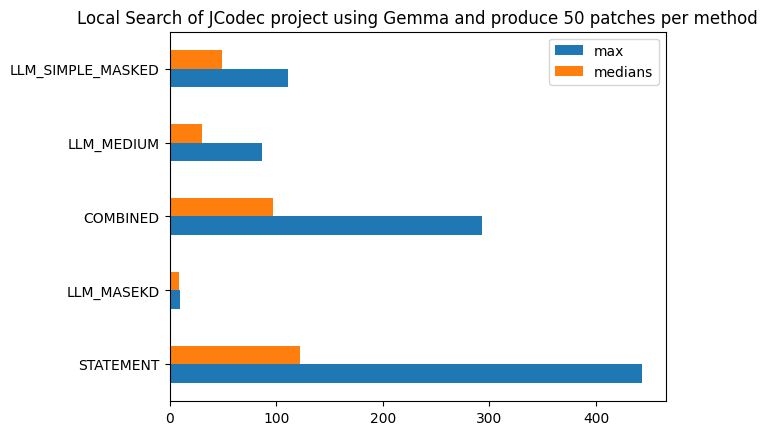

In [ ]:

# Library Import(numpy and matplotlib)

# Make a data definition
_data = {"max": max_improvements, "medians": medians,}
_df = pd.DataFrame(_data,columns=["max", "medians"], index = index)

# Multiple horizontal bar chart
_df.plot.barh()
plot.title('Local Search of JCodec project using Gemma and produce 50 patches per method')
plot.savefig('local_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plot.show()

In [ ]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.mistral.csv')

(265.0, 79.0, 14)

In [ ]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(144.0, 103.5, 2)

In [ ]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(122, 15, 4)

In [ ]:
read_result_random_search('jcodec.RandomSampler_LLM_MEDIUM_1000_output.mistral.csv')

(187, 27, 15)

## Medium without Functional signature

In [ ]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.mistral.csv')

(106.0, 35.5, 26)

In [ ]:
read_result_random_search('jcodec.RandomSampler_LLM_MEDIUM_1000_output.mistral.csv')

(359, 135, 88)

## Medium without Function signature and Smarter Statement Selection

In [8]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.mistral.csv')

(144.0, 47.5, 30)

In [9]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(52.0, 52.0, 1)

In [10]:
read_result_random_search('jcodec.RandomSampler_LLM_MEDIUM_1000_output.mistral.csv')

(371, 135, 104)

In [11]:
read_result_random_search("jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv")

(151, 17, 4)

In [12]:
read_result_random_search('jcodec.RandomSampler_STATEMENT_1000_output.csv')

(463, 125, 106)

In [13]:
read_result_local_search('jcodec.LocalSearchRuntime_STATEMENT_50_output.csv')

(117.0, 15.0, 37)

## Medium with function Signature

In [14]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.mistral.csv')

(100.0, 30.0, 23)

In [5]:
read_result_random_search('jcodec.RandomSampler_LLM_MEDIUM_1000_output.mistral.csv')

(344, 80, 40)

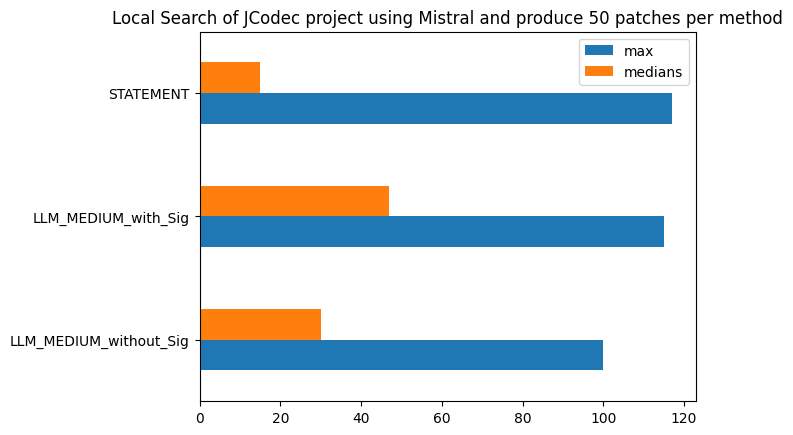

In [12]:
# Library Import(numpy and matplotlib)

max_improvements = [100.0, 115.0, 117.0]
medians = [30.0, 47, 15]
index = ['LLM_MEDIUM_without_Sig', 'LLM_MEDIUM_with_Sig', 'STATEMENT']

# Make a data definition
_data = {"max": max_improvements, "medians": medians,}
_df = pd.DataFrame(_data,columns=["max", "medians"], index = index)

# Multiple horizontal bar chart
_df.plot.barh()
plot.title('Local Search of JCodec project using Mistral and produce 50 patches per method')
plot.savefig('local_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plot.show()

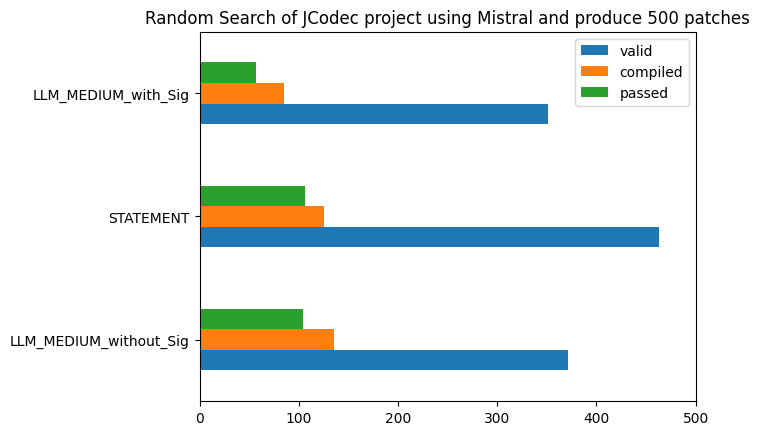

In [14]:
# Library Import(numpy and matplotlib)
valid_counts = [371, 463, 351]
compiled_counts = [135, 125, 85]
passed_counts = [104, 106, 57]
index = ['LLM_MEDIUM_without_Sig',  'STATEMENT', 'LLM_MEDIUM_with_Sig']
# Make a data definition
_data = {"valid": valid_counts, "compiled": compiled_counts, "passed": passed_counts}
_df = pd.DataFrame(_data,columns=["valid", "compiled", "passed"], index = index)
 
# Multiple horizontal bar chart
_df.plot.barh()
plot.title('Random Search of JCodec project using Mistral and produce 500 patches')
plot.xlim(0, 500)
plot.savefig('random_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plot.show()

In [6]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(138.0, 48.0, 6)

In [7]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(343, 34, 11)

In [8]:
read_result_random_search('jcodec.RandomSampler_LLM_MEDIUM_1000_output.mistral.csv')

(351, 85, 57)

In [17]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.mistral.csv')

(115.0, 35.0, 22)

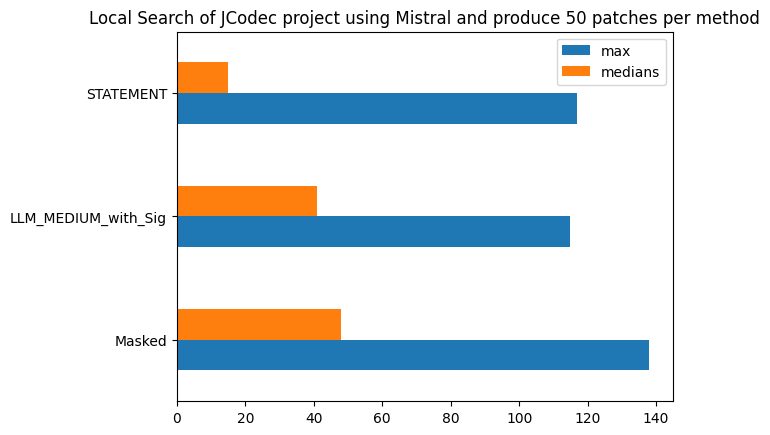

In [18]:
# Library Import(numpy and matplotlib)

max_improvements = [138.0, 115.0, 117.0]
medians = [48, 41, 15]
index = ['Masked', 'LLM_MEDIUM_with_Sig', 'STATEMENT']

# Make a data definition
_data = {"max": max_improvements, "medians": medians,}
_df = pd.DataFrame(_data,columns=["max", "medians"], index = index)

# Multiple horizontal bar chart
_df.plot.barh()
plot.title('Local Search of JCodec project using Mistral and produce 50 patches per method')
plot.savefig('local_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plot.show()

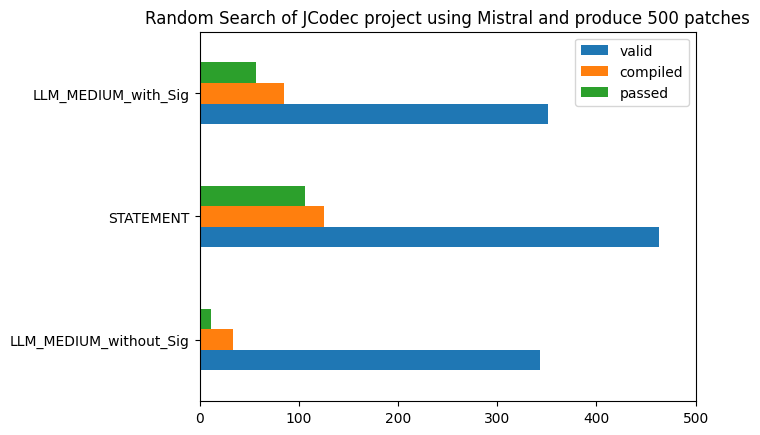

In [16]:
# Library Import(numpy and matplotlib)
valid_counts = [343, 463, 351]
compiled_counts = [34, 125, 85]
passed_counts = [11, 106, 57]
index = ['LLM_MEDIUM_without_Sig',  'STATEMENT', 'LLM_MEDIUM_with_Sig']
# Make a data definition
_data = {"valid": valid_counts, "compiled": compiled_counts, "passed": passed_counts}
_df = pd.DataFrame(_data,columns=["valid", "compiled", "passed"], index = index)
 
# Multiple horizontal bar chart
_df.plot.barh()
plot.title('Random Search of JCodec project using Mistral and produce 500 patches')
plot.xlim(0, 500)
plot.savefig('random_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plot.show()

## New profiler file and with the new profiler file, masking with both exclude assignment and declaration

In [4]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(471.0, 350.0, 5)

In [5]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(323, 30, 26)

In [6]:
read_result_random_search('jcodec.RandomSampler_LLM_MEDIUM_1000_output.mistral.csv')

(349, 70, 37)

In [7]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.mistral.csv')

(143.0, 59.0, 25)

In [8]:
read_result_random_search('jcodec.RandomSampler_STATEMENT_1000_output.csv')

(450, 81, 71)

In [9]:
read_result_local_search('jcodec.LocalSearchRuntime_STATEMENT_50_output.csv')

(178.0, 47.0, 18)

## Masking without function signature and only exclude declearation

In [10]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(204.0, 133.0, 9)

In [11]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(352, 125, 106)

## Masking with function signature and only exclude declearation

In [12]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(308.0, 308.0, 1)

In [13]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(346, 36, 29)

## Performance of Gemma

In [5]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MEDIUM_50_output.gemma2.csv')

(190.0, 47.0, 71)

In [6]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.gemma2.csv')

(200.0, 43.0, 28)

(99.0, 99.0, 1)

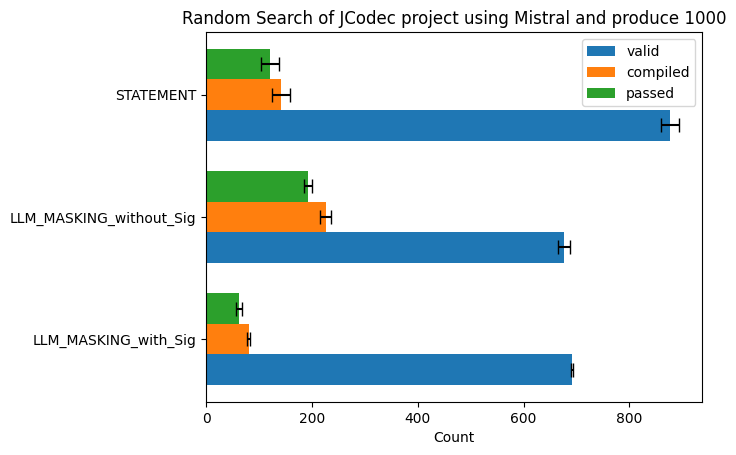

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Sample raw data
categories = ['LLM_MASKING_with_Sig', 'LLM_MASKING_without_Sig', 'STATEMENT']

# Assuming we have multiple observations for each category
# Here we'll create synthetic data for demonstration purposes
# Replace this with your actual raw data
raw_data = {
    'LLM_MASKING_with_Sig': {'valid': [696, 691, 690, 691], 'compiled': [81, 77, 85, 77], 'passed': [69, 61, 55,62]},
    'STATEMENT': {'valid': [900, 860, 870], 'compiled': [161, 141, 121], 'passed': [141, 121, 99]},
    'LLM_MASKING_without_Sig': {'valid': [686, 682, 660], 'compiled': [216,222,240], 'passed': [186, 189, 203]},
}

# Calculate mean and standard deviation for each category
means = {cat: {key: np.mean(vals) for key, vals in data.items()} for cat, data in raw_data.items()}
errors = {cat: {key: np.std(vals) for key, vals in data.items()} for cat, data in raw_data.items()}

# Prepare data for plotting
valid_means = [means[cat]['valid'] for cat in categories]
compiled_means = [means[cat]['compiled'] for cat in categories]
passed_means = [means[cat]['passed'] for cat in categories]

valid_errors = [errors[cat]['valid'] for cat in categories]
compiled_errors = [errors[cat]['compiled'] for cat in categories]
passed_errors = [errors[cat]['passed'] for cat in categories]

# Bar width
bar_width = 0.25

# Position of bars on the y-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create horizontal bars with error bars
plt.barh(r1, valid_means, height=bar_width, xerr=valid_errors, capsize=5, label='valid')
plt.barh(r2, compiled_means, height=bar_width, xerr=compiled_errors, capsize=5,  label='compiled')
plt.barh(r3, passed_means, height=bar_width, xerr=passed_errors, capsize=5, label='passed')

# Add labels
plt.xlabel('Count')
plt.title('Random Search of JCodec project using Mistral and produce 1000')
plt.yticks([r + bar_width for r in range(len(categories))], categories)

# Add legend
plt.legend()

# Show plot
plt.show()


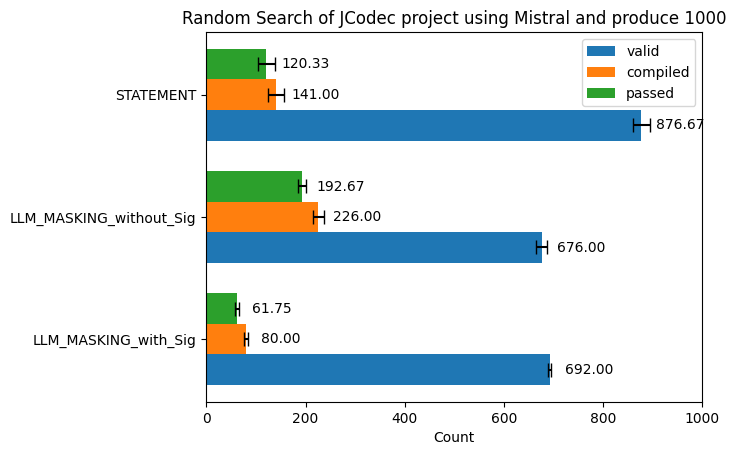

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sample raw data
categories = ['LLM_MASKING_with_Sig', 'LLM_MASKING_without_Sig', 'STATEMENT']

# Assuming we have multiple observations for each category
# Here we'll create synthetic data for demonstration purposes
# Replace this with your actual raw data
raw_data = {
    'LLM_MASKING_with_Sig': {'valid': [696, 691, 690, 691], 'compiled': [81, 77, 85, 77], 'passed': [69, 61, 55, 62]},
    'STATEMENT': {'valid': [900, 860, 870], 'compiled': [161, 141, 121], 'passed': [141, 121, 99]},
    'LLM_MASKING_without_Sig': {'valid': [686, 682, 660], 'compiled': [216, 222, 240], 'passed': [186, 189, 203]},
}

# Calculate mean and standard deviation for each category
means = {cat: {key: np.mean(vals) for key, vals in data.items()} for cat, data in raw_data.items()}
errors = {cat: {key: np.std(vals) for key, vals in data.items()} for cat, data in raw_data.items()}

# Prepare data for plotting
valid_means = [means[cat]['valid'] for cat in categories]
compiled_means = [means[cat]['compiled'] for cat in categories]
passed_means = [means[cat]['passed'] for cat in categories]

valid_errors = [errors[cat]['valid'] for cat in categories]
compiled_errors = [errors[cat]['compiled'] for cat in categories]
passed_errors = [errors[cat]['passed'] for cat in categories]

# Bar width
bar_width = 0.25

# Position of bars on the y-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create horizontal bars with error bars
bars1 = plt.barh(r1, valid_means, height=bar_width, xerr=valid_errors, capsize=5, label='valid')
bars2 = plt.barh(r2, compiled_means, height=bar_width, xerr=compiled_errors, capsize=5, label='compiled')
bars3 = plt.barh(r3, passed_means, height=bar_width, xerr=passed_errors, capsize=5, label='passed')

# Add labels
plt.xlabel('Count')
plt.title('Random Search of JCodec project using Mistral and produce 1000')
plt.yticks([r + bar_width for r in range(len(categories))], categories)

# Add legend
plt.legend()

# Add text annotations
for bar in bars1:
    plt.text(bar.get_width() + bar_width + 30, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')
for bar in bars2:
    plt.text(bar.get_width() + bar_width + 30, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')
for bar in bars3:
    plt.text(bar.get_width() + bar_width + 30, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')

plt.xlim(0, 1000)
plt.savefig('random_search_results.png', dpi=1000, bbox_inches='tight')

# Show plot
plt.show()


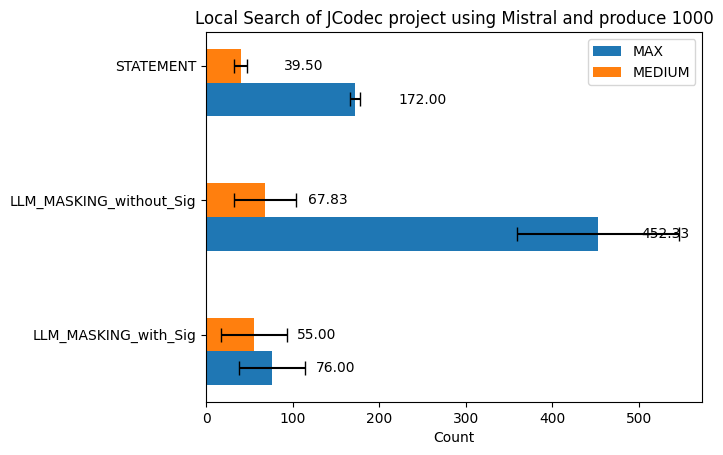

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sample raw data
categories = ['LLM_MASKING_with_Sig', 'LLM_MASKING_without_Sig', 'STATEMENT']

# Assuming we have multiple observations for each category
# Here we'll create synthetic data for demonstration purposes
# Replace this with your actual raw data
raw_data = {
    'LLM_MASKING_with_Sig': {'MAX': [65, 116, 104, 19], 'MEDIUM': [28, 116, 57, 19]},
    'STATEMENT': {'MAX': [178, 166], 'MEDIUM': [47, 32]},
    'LLM_MASKING_without_Sig': {'MAX': [333, 462, 562], 'MEDIUM': [82.5,103, 18]},
}

# Calculate mean and standard deviation for each category
means = {cat: {key: np.mean(vals) for key, vals in data.items()} for cat, data in raw_data.items()}
errors = {cat: {key: np.std(vals) for key, vals in data.items()} for cat, data in raw_data.items()}

# Prepare data for plotting
max_means = [means[cat]['MAX'] for cat in categories]
medium_means = [means[cat]['MEDIUM'] for cat in categories]

max_errors = [errors[cat]['MAX'] for cat in categories]
medium_errors = [errors[cat]['MEDIUM'] for cat in categories]

# Bar width
bar_width = 0.25

# Position of bars on the y-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create horizontal bars with error bars
bars1 = plt.barh(r1, max_means, height=bar_width, xerr=max_errors, capsize=5, label='MAX')
bars2 = plt.barh(r2, medium_means, height=bar_width, xerr=medium_errors, capsize=5, label='MEDIUM')

# Add labels
plt.xlabel('Count')
plt.title('Local Search of JCodec project using Mistral and produce 1000')
plt.yticks([r + bar_width for r in range(len(categories))], categories)

# Add legend
plt.legend()

# Add text annotations
for bar in bars1:
    plt.text(bar.get_width() + bar_width + 50, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')
for bar in bars2:
    plt.text(bar.get_width() + bar_width + 50, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')

plt.savefig('local_search_results.png', dpi=1000, bbox_inches='tight')

# Show plot
plt.show()



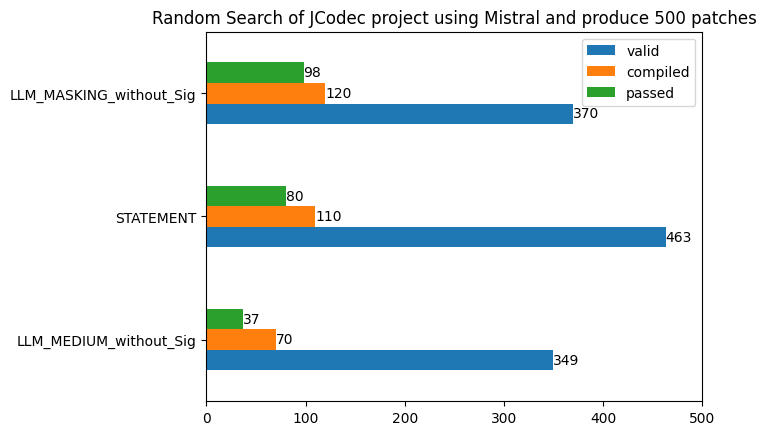

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
valid_counts = [349, 463, 370]
compiled_counts = [70, 110, 120]
passed_counts = [37, 80, 98]
index = ['LLM_MEDIUM_without_Sig', 'STATEMENT', 'LLM_MASKING_without_Sig']

# Make a data definition
_data = {"valid": valid_counts, "compiled": compiled_counts, "passed": passed_counts}
_df = pd.DataFrame(_data, columns=["valid", "compiled", "passed"], index=index)

# Plot
ax = _df.plot.barh()
plt.title('Random Search of JCodec project using Mistral and produce 500 patches')
plt.xlim(0, 500)

# Add text annotations
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')

plt.savefig('random_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()



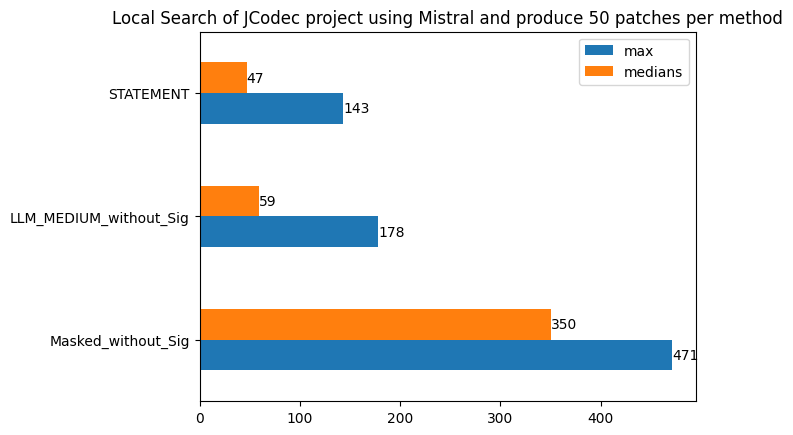

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
max_improvements = [471, 178.0, 143.0]
medians = [350, 59, 47]
index = ['Masked_without_Sig', 'LLM_MEDIUM_without_Sig', 'STATEMENT']

# Make a data definition
_data = {"max": max_improvements, "medians": medians}
_df = pd.DataFrame(_data, columns=["max", "medians"], index=index)

# Plot
ax = _df.plot.barh()
plt.title('Local Search of JCodec project using Mistral and produce 50 patches per method')

# Add text annotations
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge')

plt.savefig('local_search_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()


In [8]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(501.0, 433.0, 3)

In [9]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(190, 51, 40)

In [10]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral.csv')

(1019.0, 60.0, 3)

In [11]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral.csv')

(169, 46, 35)

In [12]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.llama3.1.csv')

(401.0, 78.0, 13)

In [13]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.llama3.1.csv')

(463, 166, 130)

In [14]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.gemma2:2b.csv')

(425.0, 109.0, 12)

In [15]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.gemma2:2b.csv')

(462, 227, 209)

In [16]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.phi3:14b.csv')

(0, 0, 0)

In [17]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.phi3:14b.csv')

(0, 0, 0)

In [8]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.llama3.1:8b-instruct-q4_0.csv')

(264.0, 54.0, 12)

In [9]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.llama3.1:8b-instruct-q4_0.csv')

(465, 181, 143)

In [10]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.gemma2:2b-instruct-q4_0.csv')

(376.0, 101.0, 15)

In [11]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.gemma2:2b-instruct-q4_0.csv')

(455, 222, 202)

In [5]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.mistral-nemo.csv')

(276.0, 50.0, 10)

In [4]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.mistral-nemo.csv')

(432, 135, 115)

In [5]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.phi3:14b.csv')

(21.0, 21.0, 1)

In [6]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.phi3:14b.csv')

(0, 0, 0)

In [7]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.llama3.1:8b-instruct-q4_0.csv')

(218.0, 53.5, 10)

In [8]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.llama3.1:8b-instruct-q4_0.csv')

(460, 158, 119)

In [9]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.llama3.1.csv')

(194.0, 66.0, 11)

In [10]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.llama3.1.csv')

(466, 169, 138)

In [11]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.gemma2:2b-instruct-q4_0.csv')

(328.0, 55.0, 19)

In [12]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.gemma2:2b-instruct-q4_0.csv')

(460, 226, 205)

In [13]:
read_result_local_search('jcodec.LocalSearchRuntime_LLM_MASKED_50_output.gemma2:2b.csv')

(176.0, 122.0, 13)

In [14]:
read_result_random_search('jcodec.RandomSampler_LLM_MASKED_1000_output.gemma2:2b.csv')

(455, 224, 206)

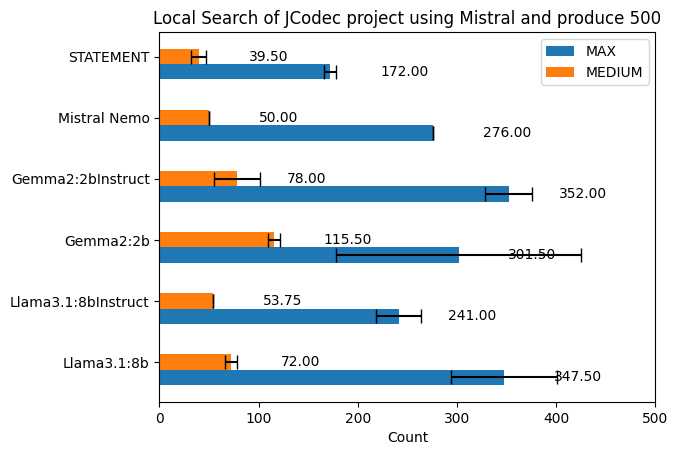

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Sample raw data
categories = ['Llama3.1:8b', 'Llama3.1:8bInstruct',  'Gemma2:2b', 'Gemma2:2bInstruct', 'Mistral Nemo', 'STATEMENT']

# Assuming we have multiple observations for each category
# Here we'll create synthetic data for demonstration purposes
# Replace this with your actual raw data
raw_data = {
    'Llama3.1:8b': {'MAX': [401,294], 'MEDIUM': [78,66]},
    'Llama3.1:8bInstruct': {'MAX': [264, 218], 'MEDIUM': [54, 53.5]},
    'Gemma2:2b': {'MAX': [178, 425], 'MEDIUM': [122,109]},
    'Gemma2:2bInstruct': {'MAX': [376, 328], 'MEDIUM': [101,55]},
    'Mistral Nemo': {'MAX': [276], 'MEDIUM': [50]},
    'STATEMENT': {'MAX': [178, 166], 'MEDIUM': [47, 32]},
}

# Calculate mean and standard deviation for each category
means = {cat: {key: np.mean(vals) for key, vals in data.items()} for cat, data in raw_data.items()}
errors = {cat: {key: np.std(vals) for key, vals in data.items()} for cat, data in raw_data.items()}

# Prepare data for plotting
max_means = [means[cat]['MAX'] for cat in categories]
medium_means = [means[cat]['MEDIUM'] for cat in categories]

max_errors = [errors[cat]['MAX'] for cat in categories]
medium_errors = [errors[cat]['MEDIUM'] for cat in categories]

# Bar width
bar_width = 0.25

# Position of bars on the y-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create horizontal bars with error bars
bars1 = plt.barh(r1, max_means, height=bar_width, xerr=max_errors, capsize=5, label='MAX')
bars2 = plt.barh(r2, medium_means, height=bar_width, xerr=medium_errors, capsize=5, label='MEDIUM')

# Add labels
plt.xlabel('Count')
plt.title('Local Search of JCodec project using Mistral and produce 500')
plt.yticks([r + bar_width for r in range(len(categories))], categories)
plt.xlim(0, 500)
# Add legend
plt.legend()

# Add text annotations
for bar in bars1:
    plt.text(bar.get_width() + bar_width + 50, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')
for bar in bars2:
    plt.text(bar.get_width() + bar_width + 50, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')

plt.savefig('local_search_results.png', dpi=1000, bbox_inches='tight')

# Show plot
plt.show()



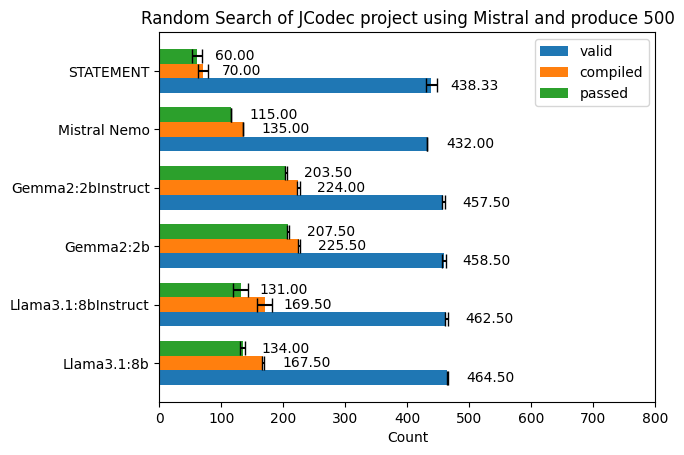

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Sample raw data
categories = ['Llama3.1:8b', 'Llama3.1:8bInstruct',  'Gemma2:2b', 'Gemma2:2bInstruct', 'Mistral Nemo', 'STATEMENT']

# Assuming we have multiple observations for each category
# Here we'll create synthetic data for demonstration purposes
# Replace this with your actual raw data
raw_data = {
    'Llama3.1:8b': {'valid': [463, 466], 'compiled': [166, 169], 'passed': [130, 138]},
    'Llama3.1:8bInstruct': {'valid': [465,460], 'compiled': [181, 158], 'passed': [143, 119]},
    'Gemma2:2b': {'valid': [462, 455], 'compiled': [227, 224], 'passed': [209, 206]},
    'Gemma2:2bInstruct': {'valid': [455, 460], 'compiled': [222, 226], 'passed': [202, 205]},
    'Mistral Nemo': {'valid': [432], 'compiled': [135], 'passed': [115]},
    'STATEMENT': {'valid': [450, 430, 435], 'compiled': [80, 70, 60], 'passed': [70, 60, 50]},


}

# Calculate mean and standard deviation for each category
means = {cat: {key: np.mean(vals) for key, vals in data.items()} for cat, data in raw_data.items()}
errors = {cat: {key: np.std(vals) for key, vals in data.items()} for cat, data in raw_data.items()}

# Prepare data for plotting
valid_means = [means[cat]['valid'] for cat in categories]
compiled_means = [means[cat]['compiled'] for cat in categories]
passed_means = [means[cat]['passed'] for cat in categories]

valid_errors = [errors[cat]['valid'] for cat in categories]
compiled_errors = [errors[cat]['compiled'] for cat in categories]
passed_errors = [errors[cat]['passed'] for cat in categories]

# Bar width
bar_width = 0.25

# Position of bars on the y-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# plt.figure(figsize=(9,6))


# Create horizontal bars with error bars
bars1 = plt.barh(r1, valid_means, height=bar_width, xerr=valid_errors, capsize=5, label='valid')
bars2 = plt.barh(r2, compiled_means, height=bar_width, xerr=compiled_errors, capsize=5, label='compiled')
bars3 = plt.barh(r3, passed_means, height=bar_width, xerr=passed_errors, capsize=5, label='passed')
# Add labels
plt.xlabel('Count')
plt.title('Random Search of JCodec project using Mistral and produce 500')
plt.yticks([r + bar_width for r in range(len(categories))], categories)

# Add legend
plt.legend()

# Add text annotations
for bar in bars1:
    plt.text(bar.get_width() + bar_width + 30, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')
for bar in bars2:
    plt.text(bar.get_width() + bar_width + 30, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')
for bar in bars3:
    plt.text(bar.get_width() + bar_width + 30, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', va='center')

plt.xlim(0, 800)
plt.savefig('random_search_results.png', dpi=1000, bbox_inches='tight')

# Show plot
plt.show()
